In [225]:
import os
import pandas as pd
import numpy as np
import json
#need pip install langcodes
# and pip install language_data
from langcodes import *
import matplotlib.pyplot as plt
import pycountry

In [3]:
dfs = []
for r, d, f in os.walk(os.getcwd()):
    for file in f:
        if 'withheldtweets.json' in file:
            dfs.append(pd.read_json("./censored_tweets/%s" % file, lines=True))

df_cen = pd.concat(dfs)
df_cen = df_cen.dropna(subset=['withheld_in_countries'])

## Basic commands to understand better the data 
There are 39 features that are listed below 

In [355]:
print(len(df_cen.columns))
print(df_cen.columns)
print(df_cen.dtypes)
features_bool = ['truncated', 'is_quote_status', 'favorited', 'retweeted']
features_count = ['quote_count', 'reply_count', 'retweet_count', 'favorite_count']
features_dates = ['created_at', 'timestamp_ms']
features_quoted = ['quoted_status_id', 'quoted_status_id_str','quoted_status', 'quoted_status_permalink']

42
Index(['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source',
       'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'withheld_in_countries', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'extended_entities', 'favorited', 'retweeted',
       'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms', 'linked',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_tweet',
       'withheld_copyright', 'language', 'whcs', 'user_name'],
      dtype='object')
created_at                   datetime64[ns, UTC]
id                                         int64
id_str                                     int64
text                                      object
display_tex

In [16]:
df_cen.iloc[:5,:20].head(5)

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,withheld_in_countries,is_quote_status,quote_count
0,2021-01-01 10:22:38+00:00,1344952164440027136,1344952164440027136,Berxwedana xelkê Şengalê a dijî peymana Iraq û...,"[0, 100]","<a href=""https://twitter.com/rojnewsku"" rel=""n...",False,NaN,NaN,NaN,NaN,None,"{'id': 2963674583, 'id_str': '2963674583', 'na...",NaN,NaN,None,NaN,[TR],False,0
1,2021-01-01 10:22:45+00:00,1344952193783357440,1344952193783357440,RT @CumSweatnTears: 🕷️ https://t.co/gcgKP5kV2w,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 3918070936, 'id_str': '3918070936', 'na...",NaN,NaN,None,NaN,[XX],False,0
2,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 963003026570121216, 'id_str': '96300302...",NaN,NaN,None,NaN,[IN],False,0
3,2021-01-01 10:16:14+00:00,1344950553835671554,1344950553835671552,RT @ZaidZamanHamid: أنا لا أريد تخويفك، ولكن أ...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 963003026570121216, 'id_str': '96300302...",NaN,NaN,None,NaN,[IN],False,0
4,2021-01-01 10:02:39+00:00,1344947135473717249,1344947135473717248,"RT @fatihakalan: Nedim Şener, açık açık @RTErd...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 869406746, 'id_str': '869406746', 'name...",NaN,NaN,None,NaN,[TR],True,0


In [17]:
df_cen.iloc[:5,20:].head(5)

,reply_count,retweet_count,favorite_count,entities,extended_entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,linked,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,withheld_copyright
0,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...","{'media': [{'id': 1344952160539312130, 'id_str...",False,False,1.0,low,tr,2021-01-01 10:22:38.662,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1343640995154460673, 'id_str...",False,False,1.0,low,und,2021-01-01 10:22:45.658,no,{'created_at': 'Mon Dec 28 19:32:51 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,ar,2021-01-01 10:16:14.664,no,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,ar,2021-01-01 10:16:14.664,retweeted,{'created_at': 'Wed Dec 30 15:57:10 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,False,False,NaN,low,tr,2021-01-01 10:02:39.663,no,{'created_at': 'Thu Dec 31 23:08:51 +0000 2020...,1.344163e+18,1.344163e+18,{'created_at': 'Wed Dec 30 06:05:00 +0000 2020...,"{'url': 'https://t.co/nNXgYBnJ0G', 'expanded':...",NaN,NaN


In [19]:
df_cen.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str,withheld_copyright
count,4.172700e+04,4.172700e+04,1.058000e+03,1.058000e+03,1.089000e+03,1.089000e+03,0.0,41727.0,41727.0,41727.0,41727.0,9088.000000,3.713000e+03,3.713000e+03,290.0
mean,1.366049e+18,1.366049e+18,1.364930e+18,1.364930e+18,6.562730e+17,6.562730e+17,NaN,0.0,0.0,0.0,0.0,0.133473,1.354050e+18,1.354050e+18,1.0
std,7.452698e+15,7.452698e+15,2.850178e+16,2.850178e+16,5.889037e+17,5.889037e+17,NaN,0.0,0.0,0.0,0.0,0.340104,6.800711e+16,6.800711e+16,0.0
min,1.344912e+18,1.344912e+18,4.735386e+17,4.735386e+17,7.832140e+05,7.832140e+05,NaN,0.0,0.0,0.0,0.0,0.000000,1.683561e+17,1.683561e+17,1.0
25%,1.361092e+18,1.361092e+18,1.361765e+18,1.361765e+18,7.529377e+08,7.529377e+08,NaN,0.0,0.0,0.0,0.0,0.000000,1.358057e+18,1.358057e+18,1.0
50%,1.367062e+18,1.367062e+18,1.366562e+18,1.366562e+18,8.822788e+17,8.822788e+17,NaN,0.0,0.0,0.0,0.0,0.000000,1.363943e+18,1.363943e+18,1.0
75%,1.372052e+18,1.372052e+18,1.370652e+18,1.370652e+18,1.240601e+18,1.240601e+18,NaN,0.0,0.0,0.0,0.0,0.000000,1.371185e+18,1.371185e+18,1.0
max,1.377501e+18,1.377501e+18,1.377479e+18,1.377479e+18,1.373604e+18,1.373604e+18,NaN,0.0,0.0,0.0,0.0,1.000000,1.377335e+18,1.377335e+18,1.0


## Get insight where tweets are withhelded
We have tweets that are withhelded only from 7 countries that are Brazil, France, Germany, Israel, India, Russian Federation and Turkey


### Tweets withhelded in many countries
We see that most of the tweets have only one country where it is withhelded. 

More over for tweet that are withhelded in 2 countries, there are only for pairs
- France, German
- German, Russia
- Brazil, XX 

where XX seems an undefined country. Maybe we will have to remove this country to make the analysis on Brazil  

In [165]:
df_cen['whcs'] = df_cen.withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l]).apply(lambda x : ', '.join(x))

In [223]:
print(df_cen.groupby('whcs').apply(len).index)
countries = [x for x in list(df_cen.groupby('whcs').apply(len).index)  if ',' not in x]

Index(['Brazil', 'Brazil, Undefined', 'France', 'Germany', 'Germany, France',
       'Germany, Russian Federation', 'India', 'Israel', 'Russian Federation',
       'Turkey', 'Undefined'],
      dtype='object', name='whcs')


<AxesSubplot:>

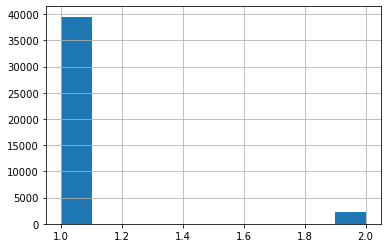

In [142]:
withheld_in_countries = df_cen[['text','withheld_in_countries']].copy()
withheld_in_countries['withheld_in_countries'] = withheld_in_countries['withheld_in_countries'].apply(list)
withheld_in_countries['nb_withheld_countries'] = withheld_in_countries['withheld_in_countries'].apply(len)
withheld_in_countries['nb_withheld_countries'].hist()

In [164]:
def get_name_country(x):
    country = pycountry.countries.get(alpha_2=x)
    if country == None:
        return 'Undefined'
    return country.name
withheld_in_2_countries = withheld_in_countries[withheld_in_countries['nb_withheld_countries'] == 2].withheld_in_countries.apply(lambda l : [get_name_country(c) for c in l])
withheld_in_2_countries_count = withheld_in_2_countries.groupby(withheld_in_2_countries.apply(str)).apply(len)
withheld_in_2_countries_count

withheld_in_countries
['Brazil', 'Undefined']                33
['Germany', 'France']                2037
['Germany', 'Russian Federation']     150
Name: withheld_in_countries, dtype: int64

## Look at XX country

In [224]:
language_of_XX = pd.DataFrame(df_cen[df_cen.withheld_in_countries.apply(lambda x : 'XX' in x)].groupby('lang').apply(len).sort_values(ascending = False)).reset_index()
language_of_XX['lang'] = language_of_XX['lang'].apply(lambda x : Language.get(x).display_name())
language_of_XX.head()


,lang,0
0,Unknown language,412
1,English,295
2,Japanese,83
3,Spanish,77
4,Portuguese,66


## Language
Most of the withhelded tweets are in English, Urdu (language spoken in Pakistan), Turkish.

In [147]:
df_cen['language'] = df_cen['lang'].apply(lambda x : Language.get(x).display_name())
df_cen.groupby('language').apply(len).sort_values(ascending = False).head(10)

language
English             15536
Urdu                11884
Turkish              7850
Unknown language     2429
Arabic                561
German                537
French                469
Indonesian            341
Hindi                 250
Spanish               233
dtype: int64

In [190]:
lang_repartition_by_whcs = pd.DataFrame(df_cen.groupby(['whcs', 'language']).apply(len).sort_values(ascending = False)).reset_index()

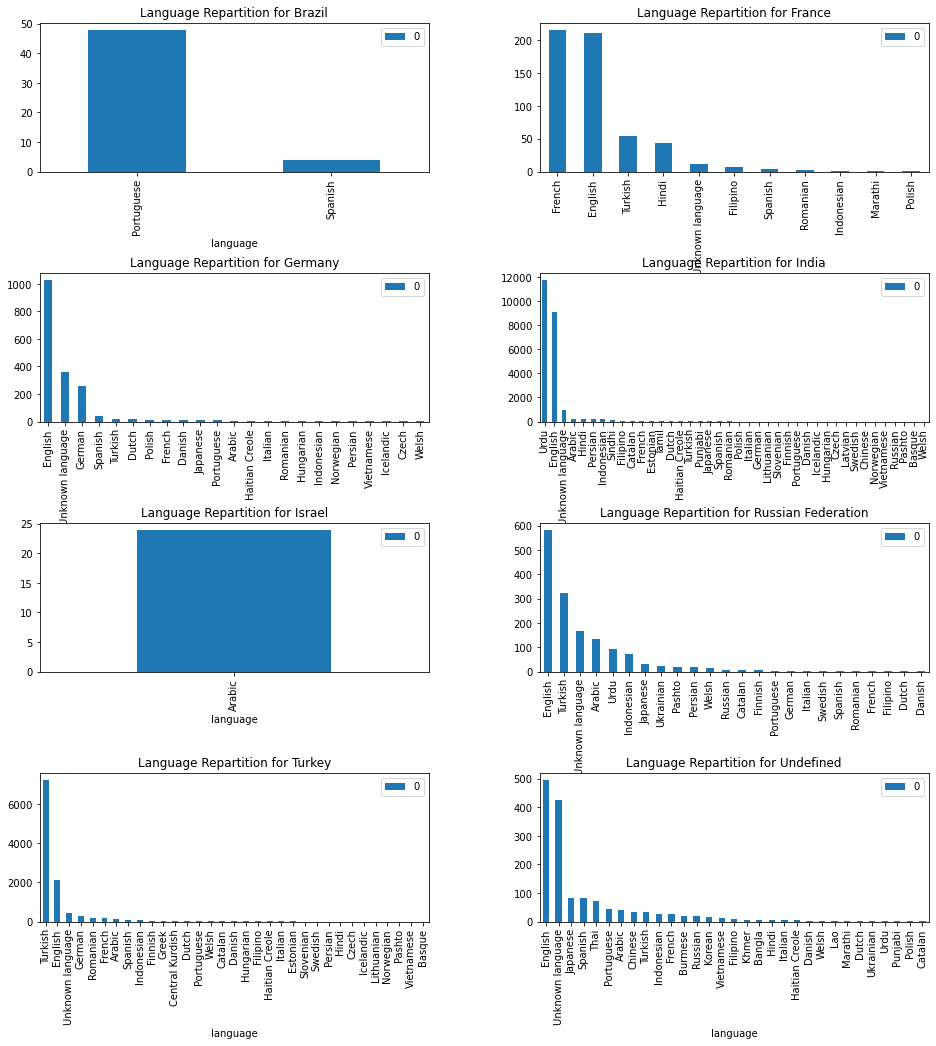

In [248]:
def show_language_repartition_for(country):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country].plot.bar(x='language', y=0).set_title('Language Repartition for '+str(country))

fig, axs = plt.subplots((len(countries)+1)//2, 2, figsize = (15,15))
fig.tight_layout(pad=8.0)
axs = axs.ravel()
for i, country in enumerate(countries):
    lang_repartition_by_whcs[lang_repartition_by_whcs.whcs == country][[ 0, 'language']].plot(x = 'language', y = 0, ax=axs[i], kind='bar').set_title('Language Repartition for '+str(country))

## See other features 
We can see that there are 18 features that have a lot of `NaN`. `contributors` is always `NaN` and should be deleted. There is only one entry where `geo` and `coordinates` are not `NaN`  

For countable features (i.e. `quote_count`, `reply_count`, `retweet_count`, `favorite_count`) all values are at $0$. Therefore these columns have no interest for us.

The dates `created at` and `timestamp_ms` seems to be exactly the same except the second one is more precise.  

`possibly_sensitive` takes only values in $\{0,1\}$ and should be transformed in boolean type 

`favorited` and `retweeted` are always `False` and should be deleted

`filter_level` is always `low` and should be deleted

In [273]:
total = len(df_cen)
print("There are %d tweets"%(total))
for col in df_cen.columns :
    nb_na = df_cen[col].isna().sum()
    if nb_na > 0 :
        print("Column %25s has in total %5d entries that are NaN "%(col, nb_na))


There are 41727 tweets
Column        display_text_range has in total 40153 entries that are NaN 
Column     in_reply_to_status_id has in total 40669 entries that are NaN 
Column in_reply_to_status_id_str has in total 40669 entries that are NaN 
Column       in_reply_to_user_id has in total 40638 entries that are NaN 
Column   in_reply_to_user_id_str has in total 40638 entries that are NaN 
Column   in_reply_to_screen_name has in total 40638 entries that are NaN 
Column                       geo has in total 41726 entries that are NaN 
Column               coordinates has in total 41726 entries that are NaN 
Column                     place has in total 41690 entries that are NaN 
Column              contributors has in total 41727 entries that are NaN 
Column         extended_entities has in total 35326 entries that are NaN 
Column        possibly_sensitive has in total 32639 entries that are NaN 
Column          retweeted_status has in total  2889 entries that are NaN 
Column         

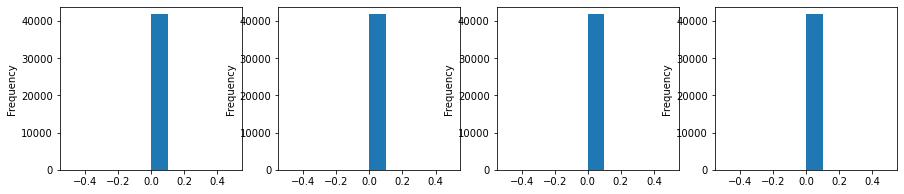

In [303]:
fig, axs = plt.subplots(1, 4, figsize = (15,3))
axs = axs.ravel()
for i, f in enumerate(features_count):
    df_cen[f].plot(ax = axs[i], kind = 'hist')

,created_at,timestamp_ms
0,2021-01-01 10:22:38+00:00,2021-01-01 10:22:38.662
1,2021-01-01 10:22:45+00:00,2021-01-01 10:22:45.658
2,2021-01-01 10:16:14+00:00,2021-01-01 10:16:14.664
3,2021-01-01 10:16:14+00:00,2021-01-01 10:16:14.664
4,2021-01-01 10:02:39+00:00,2021-01-01 10:02:39.663
...,...,...
673,2021-04-01 04:08:48+00:00,2021-04-01 04:08:48.659
674,2021-04-01 04:40:48+00:00,2021-04-01 04:40:48.657
676,2021-04-01 04:51:54+00:00,2021-04-01 04:51:54.660
677,2021-04-01 04:51:54+00:00,2021-04-01 04:51:54.660


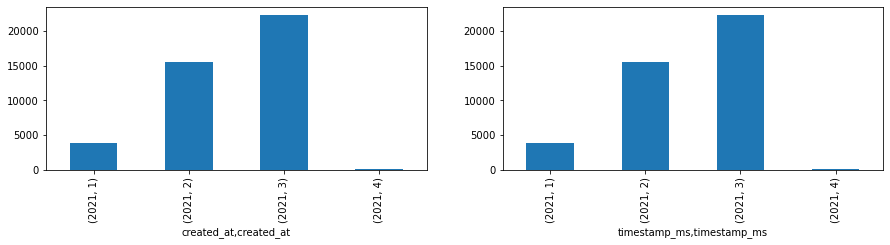

In [308]:
fig, axs = plt.subplots(1, 2, figsize = (15,3))
axs = axs.ravel()
df_cen.created_at.groupby([df_cen["created_at"].dt.year, df_cen["created_at"].dt.month]).count().plot(ax = axs[0], kind="bar")
df_cen.created_at.groupby([df_cen["timestamp_ms"].dt.year, df_cen["timestamp_ms"].dt.month]).count().plot(ax = axs[1], kind="bar")
df_cen[['created_at', 'timestamp_ms']]

In [312]:
for feat in features_bool :
    print(df_cen.groupby(feat).apply(len), '\n')

truncated
False    40693
True      1034
dtype: int64 

is_quote_status
False    38011
True      3716
dtype: int64 

favorited
False    41727
dtype: int64 

retweeted
False    41727
dtype: int64 



In [315]:
print(df_cen.groupby('possibly_sensitive').apply(len), '\n')
df_cen[df_cen.possibly_sensitive.notna()][['possibly_sensitive', 'withheld_in_countries', 'text' ]]

possibly_sensitive
0.0    7875
1.0    1213
dtype: int64 



,possibly_sensitive,withheld_in_countries,text
0,1.0,[TR],Berxwedana xelkê Şengalê a dijî peymana Iraq û...
1,1.0,[XX],RT @CumSweatnTears: 🕷️ https://t.co/gcgKP5kV2w
14,0.0,[FR],RT @AlainSoralOffic: Soral répond épisode 23 :...
15,0.0,[FR],RT @AlainSoralOffic: Soral répond épisode 23 :...
17,1.0,[DE],"Und noch ein Video verkauft! Schau dir ""schwar..."
...,...,...,...
649,0.0,[TR],RT @ANHA_TR_yedek: #Hol Kampı’nda yeni patlayı...
650,0.0,[TR],RT @ANHA_TR_yedek: #Hol Kampı’nda yeni patlayı...
658,0.0,[TR],RT @mutludc: US-backed Syrian Kurdish forces d...
665,0.0,[IN],RT @AA_MW_: میری ہر نسل تجھ پر قربان\nاے میرے ...


## Users

In [325]:
df_cen.iloc[0].user

{'id': 2963674583,
 'id_str': '2963674583',
 'name': 'Rojnews Kurmancî',
 'screen_name': 'kurmancirojnews',
 'location': None,
 'url': 'https://rojnews.news/ku',
 'description': 'Ajansa nûçeyan a Başûrê Kurdistanê.',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 40283,
 'friends_count': 1,
 'listed_count': 53,
 'favourites_count': 0,
 'statuses_count': 41733,
 'created_at': 'Tue Jan 06 07:59:37 +0000 2015',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_sidebar_border_color': 'C0DEED',
 'profile_sidebar_fill_color': 'DDEEF6',
 'profile_text_color': '333333',
 'profile_

In [332]:
df_cen['user_name'] = df_cen.apply(lambda x : x.user['name'], axis = 1)
df_cen.groupby('user_name').apply(len).sort_values(ascending = False)

user_name
🇵🇱LaureenPink ™©ONLYFANS-Girl🇵🇱    367
افضال احمد                         304
Murteza Haçkalı 1461               244
Maqbool Ahmad                      243
Muhammad nawaz sunpal              195
                                  ... 
Qendîl Kobanê (قنديل كوباني)         1
Malik wajid Ali                      1
𝕞𝕒𝕧𝕖                                 1
HBDHareketi                          1
Mansoor S. Shah                      1
Length: 10018, dtype: int64

<AxesSubplot:>

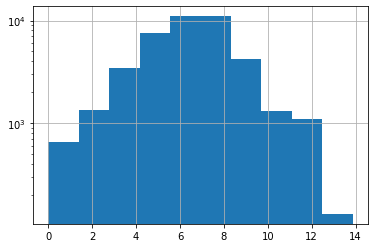

In [339]:
df_cen.user.apply(lambda x : np.log(x['followers_count']+1)).hist(log = True)

In [345]:
df_cen.groupby('filter_level').apply(len)

filter_level
low    41727
dtype: int64

In [348]:
df_cen.iloc[0].extended_entities

{'media': [{'id': 1344952160539312130,
   'id_str': '1344952160539312130',
   'indices': [101, 124],
   'media_url': 'http://pbs.twimg.com/media/Eqo63TjXAAI_59U.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/Eqo63TjXAAI_59U.jpg',
   'url': 'https://t.co/3X9XzfCaAO',
   'display_url': 'pic.twitter.com/3X9XzfCaAO',
   'expanded_url': 'https://twitter.com/kurmancirojnews/status/1344952164440027136/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 340, 'resize': 'fit'},
    'large': {'w': 750, 'h': 375, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 750, 'h': 375, 'resize': 'fit'}}}]}

In [358]:
for feat in features_quoted :
    print(feat, df_cen[df_cen[feat].notna()].iloc[0][feat], '\n')

quoted_status_id 1.3441625515721318e+18 

quoted_status_id_str 1.3441625515721318e+18 

quoted_status {'created_at': 'Wed Dec 30 06:05:00 +0000 2020', 'id': 1344162551572131841, 'id_str': '1344162551572131841', 'text': 'Nedim Şener: 15 Temmuz başarılı olsaydı, Muhsin Yazıcıoğlu dosyası Erdoğan ve Hakan Fidan’ın yargılanacağı bir kump… https://t.co/Jlpo1OJXu9', 'display_text_range': [0, 140], 'source': '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 80549263, 'id_str': '80549263', 'name': 'T24', 'screen_name': 't24comtr', 'location': 'Türkiye', 'url': 'http://t24.com.tr', 'description': 'Bağımsız İnternet Gazetesi\nhttp://facebook.com/T24comtr\nhttp://instagram.com/T24comtr\nhttp://youtube.com/T24comtr', 'translator_type': 'regular', 'protected': False, 've